In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('credit_risk_dataset.csv',nrows=5000)
data = data.dropna() 
# Perform label encoding for categorical variables
label_encoder = LabelEncoder()

# Store encoding mappings in a dictionary
encoding_map = {}

# Encode categorical columns
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = label_encoder.fit_transform(data[col].astype(str))
        encoding_map[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the encoding map
print("Encoding Map:")
for col, mapping in encoding_map.items():
    print(col, ":", mapping)


# Split the data into features and target variable
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Encoding Map:
person_home_ownership : {'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}
loan_intent : {'DEBTCONSOLIDATION': 0, 'EDUCATION': 1, 'HOMEIMPROVEMENT': 2, 'MEDICAL': 3, 'PERSONAL': 4, 'VENTURE': 5}
loan_grade : {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
cb_person_default_on_file : {'N': 0, 'Y': 1}
Accuracy: 0.8515535097813579

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       584
           1       0.78      0.77      0.77       285

    accuracy                           0.85       869
   macro avg       0.83      0.83      0.83       869
weighted avg       0.85      0.85      0.85       869


Confusion Matrix:
[[521  63]
 [ 66 219]]


LIME

In [19]:
import lime
import lime.lime_tabular

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Not Default', 'Default'], discretize_continuous=True)

# Choose an instance for explanation (e.g., the first instance in the test set)
instance = X_test.iloc[[1]]

# Explain the prediction
explanation = explainer.explain_instance(instance.values[0], clf.predict_proba, num_features=5)

# Show explanation
explanation.show_in_notebook()

# Print the encoding map
print("Encoding Map:")
for col, mapping in encoding_map.items():
    print(col, ":", mapping)

/Users/armaanthakur/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Encoding Map:
person_home_ownership : {'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}
loan_intent : {'DEBTCONSOLIDATION': 0, 'EDUCATION': 1, 'HOMEIMPROVEMENT': 2, 'MEDICAL': 3, 'PERSONAL': 4, 'VENTURE': 5}
loan_grade : {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
cb_person_default_on_file : {'N': 0, 'Y': 1}


SHAP

In [24]:
import shap
explainer = shap.Explainer(clf.predict, X_test)
shap_values = explainer(X_test)

ExactExplainer explainer: 870it [00:10,  4.81it/s]                         


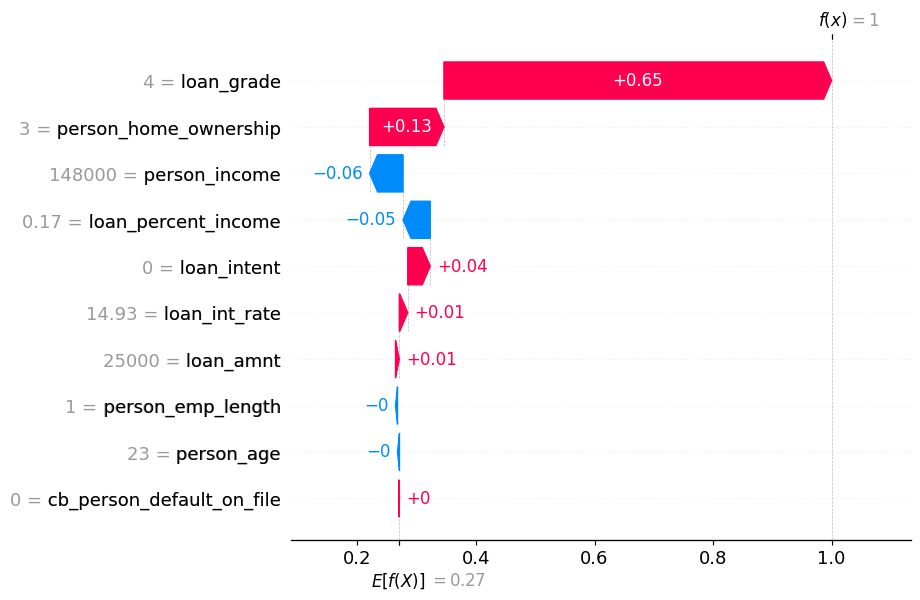

In [25]:
shap.waterfall_plot(shap_values[1])

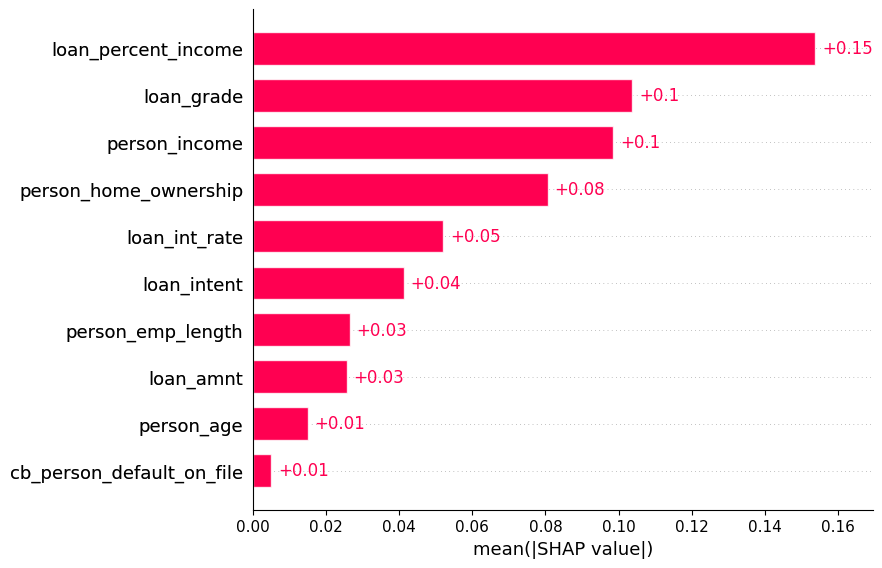

In [26]:
shap.plots.bar(shap_values) #feature importance

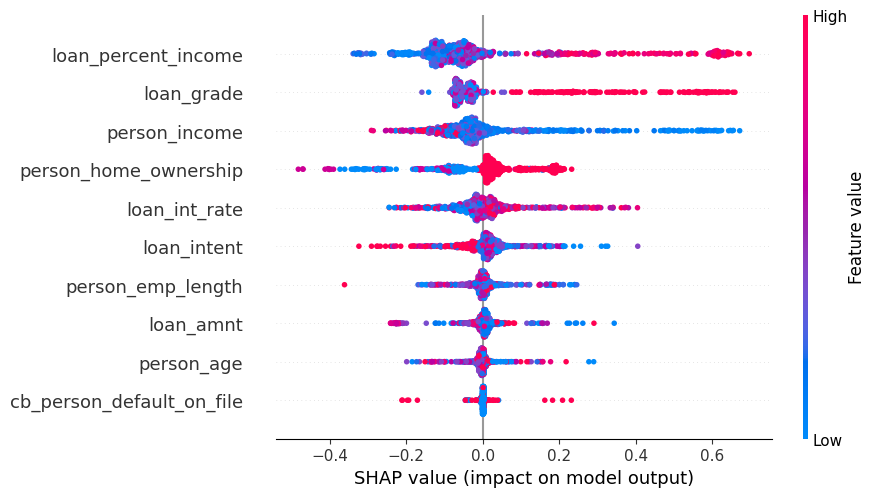

In [15]:
shap.plots.beeswarm(shap_values)

Visualizing the Decision Tree

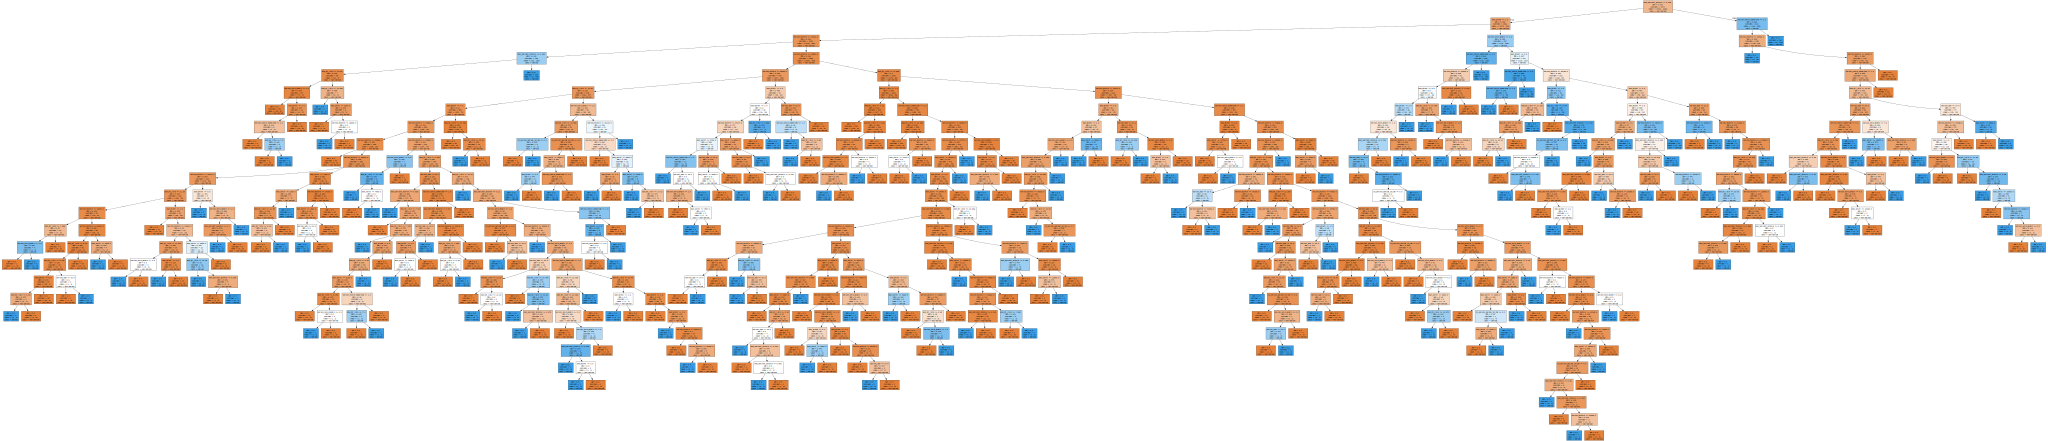

In [16]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a DOT file
export_graphviz(clf, out_file='decision_tree.dot', 
                feature_names=X.columns, 
                class_names=['Non-Default', 'Default'], 
                filled=True)

# Visualize the decision tree using Graphviz
with open("decision_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
